X_train shape: (3737, 22)
y_train shape: (3737, 1)
X_test shape: (1601, 22)
y_test shape: (1601, 1)
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best hyperparameters found:  {'algorithm': 'ball_tree', 'n_neighbors': 11, 'weights': 'distance'}
Training RMSE: 0.0006, MAE: 0.0001, R2: 0.9998
Testing RMSE: 0.0119, MAE: 0.0065, R2: 0.8970


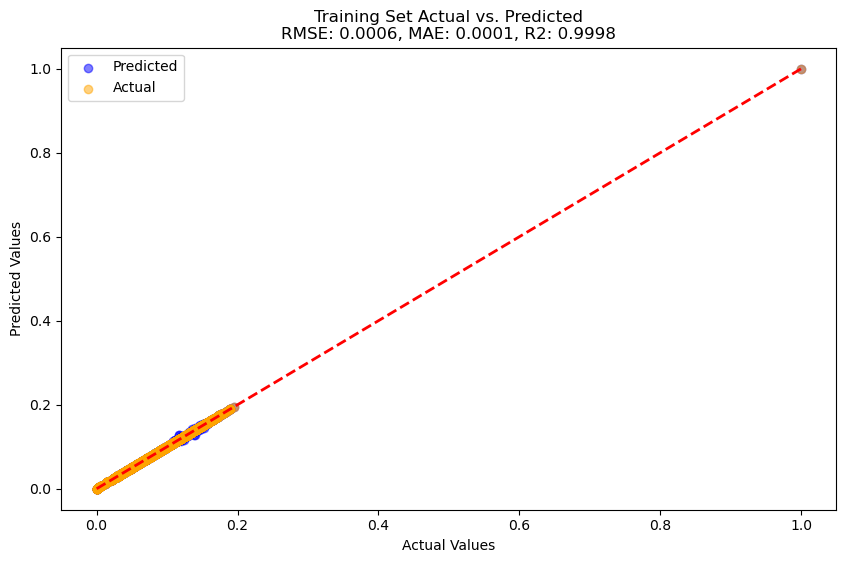

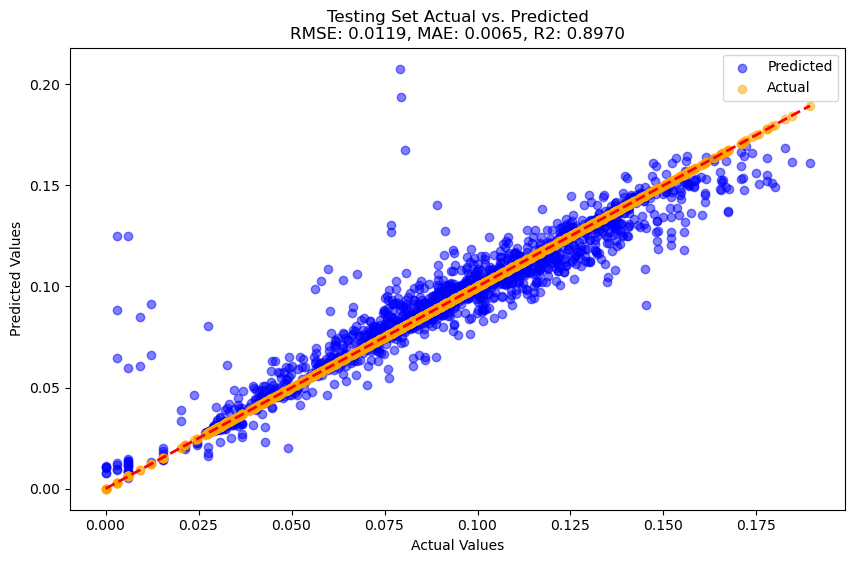

In [3]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from math import sqrt

# Define the file path to the Excel file
file_path = "C:/Users/Laura/OneDrive - HKUST (Guangzhou)/桌面/geological storage/pressure_splits_70_30.xlsx"

# Load the Excel file
xls = pd.ExcelFile(file_path)

# Load each sheet into a DataFrame and assign it to a variable
X_train = pd.read_excel(xls, sheet_name='X_train')
y_train = pd.read_excel(xls, sheet_name='y_train')
X_test = pd.read_excel(xls, sheet_name='X_test')
y_test = pd.read_excel(xls, sheet_name='y_test')

# Ensure all data is float and handle missing values
def clean_data(X, y):
    combined = pd.concat([X, y], axis=1)
    combined = combined.replace([np.inf, -np.inf], np.nan)
    combined = combined.dropna()
    return combined.iloc[:, :-y.shape[1]], combined.iloc[:, -y.shape[1]:]

X_train, y_train = clean_data(X_train, y_train)
X_test, y_test = clean_data(X_test, y_test)

# Optionally, print the shape of each DataFrame to verify the data
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Define the KNN model
knn_model = KNeighborsRegressor()

# Define the hyperparameters grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Measure training time
start_time = time.time()
grid_search.fit(X_train, y_train.values.ravel())
training_time = time.time() - start_time

# Best model after GridSearch
best_knn_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best hyperparameters found: ", grid_search.best_params_)

# Fit the best model on the training set
best_knn_model.fit(X_train, y_train.values.ravel())

# Make predictions on the datasets
y_train_pred = best_knn_model.predict(X_train)
y_test_pred = best_knn_model.predict(X_test)

# Calculate metrics for each set
train_rmse = sqrt(mean_squared_error(y_train, y_train_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_rmse = sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print metrics
print(f"Training RMSE: {train_rmse:.4f}, MAE: {train_mae:.4f}, R2: {train_r2:.4f}")
print(f"Testing RMSE: {test_rmse:.4f}, MAE: {test_mae:.4f}, R2: {test_r2:.4f}")

# Function to plot the actual vs. predicted values with different colors
def plot_actual_vs_predicted(y_true, y_pred, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, alpha=0.5, label='Predicted', color='blue')
    plt.scatter(y_true, y_true, alpha=0.5, label='Actual', color='orange')
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.title(title)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.legend()
    plt.show()

# Plot actual vs. predicted values for each set
plot_actual_vs_predicted(y_train.values, y_train_pred, f'Training Set Actual vs. Predicted\nRMSE: {train_rmse:.4f}, MAE: {train_mae:.4f}, R2: {train_r2:.4f}')
plot_actual_vs_predicted(y_test.values, y_test_pred, f'Testing Set Actual vs. Predicted\nRMSE: {test_rmse:.4f}, MAE: {test_mae:.4f}, R2: {test_r2:.4f}')


X_train shape: (4005, 22)
y_train shape: (4005, 1)
X_test shape: (1333, 22)
y_test shape: (1333, 1)
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best hyperparameters found:  {'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'distance'}
Training RMSE: 0.0005, MAE: 0.0001, R2: 0.9998
Testing RMSE: 0.0118, MAE: 0.0061, R2: 0.8992


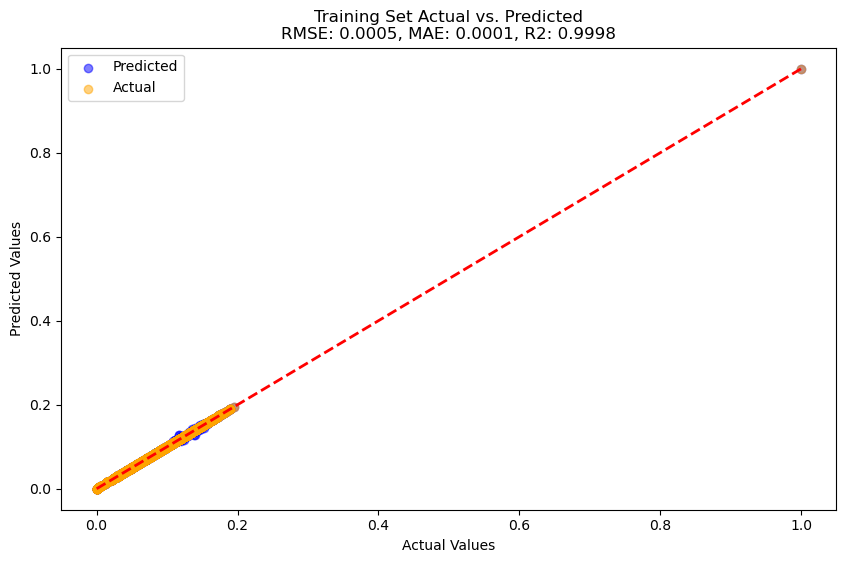

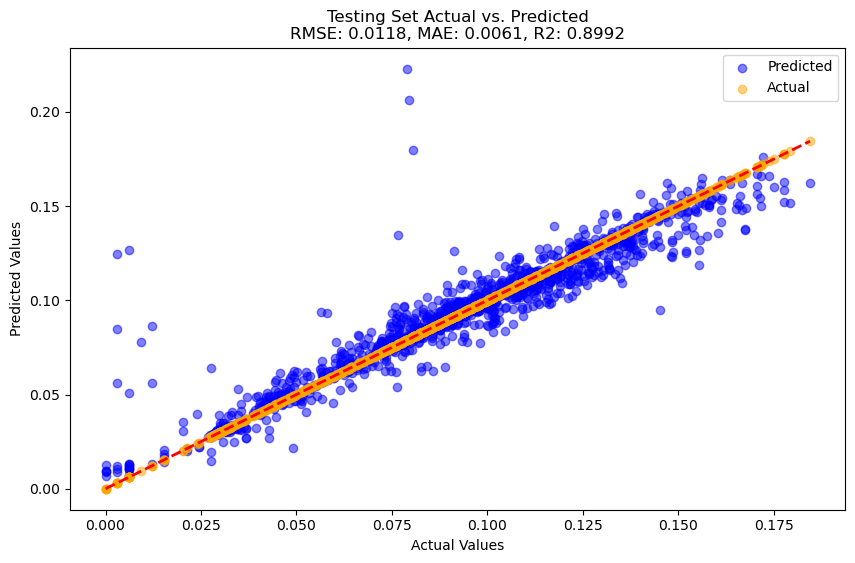

In [5]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from math import sqrt

# Define the file path to the Excel file
file_path = "C:/Users/Laura/OneDrive - HKUST (Guangzhou)/桌面/geological storage/pressure_splits_75_25.xlsx"

# Load the Excel file
xls = pd.ExcelFile(file_path)

# Load each sheet into a DataFrame and assign it to a variable
X_train = pd.read_excel(xls, sheet_name='X_train')
y_train = pd.read_excel(xls, sheet_name='y_train')
X_test = pd.read_excel(xls, sheet_name='X_test')
y_test = pd.read_excel(xls, sheet_name='y_test')

# Ensure all data is float and handle missing values
def clean_data(X, y):
    combined = pd.concat([X, y], axis=1)
    combined = combined.replace([np.inf, -np.inf], np.nan)
    combined = combined.dropna()
    return combined.iloc[:, :-y.shape[1]], combined.iloc[:, -y.shape[1]:]

X_train, y_train = clean_data(X_train, y_train)
X_test, y_test = clean_data(X_test, y_test)

# Optionally, print the shape of each DataFrame to verify the data
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Define the KNN model
knn_model = KNeighborsRegressor()

# Define the hyperparameters grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Measure training time
start_time = time.time()
grid_search.fit(X_train, y_train.values.ravel())
training_time = time.time() - start_time

# Best model after GridSearch
best_knn_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best hyperparameters found: ", grid_search.best_params_)

# Fit the best model on the training set
best_knn_model.fit(X_train, y_train.values.ravel())

# Make predictions on the datasets
y_train_pred = best_knn_model.predict(X_train)
y_test_pred = best_knn_model.predict(X_test)

# Calculate metrics for each set
train_rmse = sqrt(mean_squared_error(y_train, y_train_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_rmse = sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print metrics
print(f"Training RMSE: {train_rmse:.4f}, MAE: {train_mae:.4f}, R2: {train_r2:.4f}")
print(f"Testing RMSE: {test_rmse:.4f}, MAE: {test_mae:.4f}, R2: {test_r2:.4f}")

# Function to plot the actual vs. predicted values with different colors
def plot_actual_vs_predicted(y_true, y_pred, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, alpha=0.5, label='Predicted', color='blue')
    plt.scatter(y_true, y_true, alpha=0.5, label='Actual', color='orange')
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.title(title)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.legend()
    plt.show()

# Plot actual vs. predicted values for each set
plot_actual_vs_predicted(y_train.values, y_train_pred, f'Training Set Actual vs. Predicted\nRMSE: {train_rmse:.4f}, MAE: {train_mae:.4f}, R2: {train_r2:.4f}')
plot_actual_vs_predicted(y_test.values, y_test_pred, f'Testing Set Actual vs. Predicted\nRMSE: {test_rmse:.4f}, MAE: {test_mae:.4f}, R2: {test_r2:.4f}')


X_train shape: (4271, 22)
y_train shape: (4271, 1)
X_test shape: (1067, 22)
y_test shape: (1067, 1)
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best hyperparameters found:  {'algorithm': 'kd_tree', 'n_neighbors': 5, 'weights': 'distance'}
Training RMSE: 0.0006, MAE: 0.0001, R2: 0.9998
Testing RMSE: 0.0126, MAE: 0.0054, R2: 0.8851


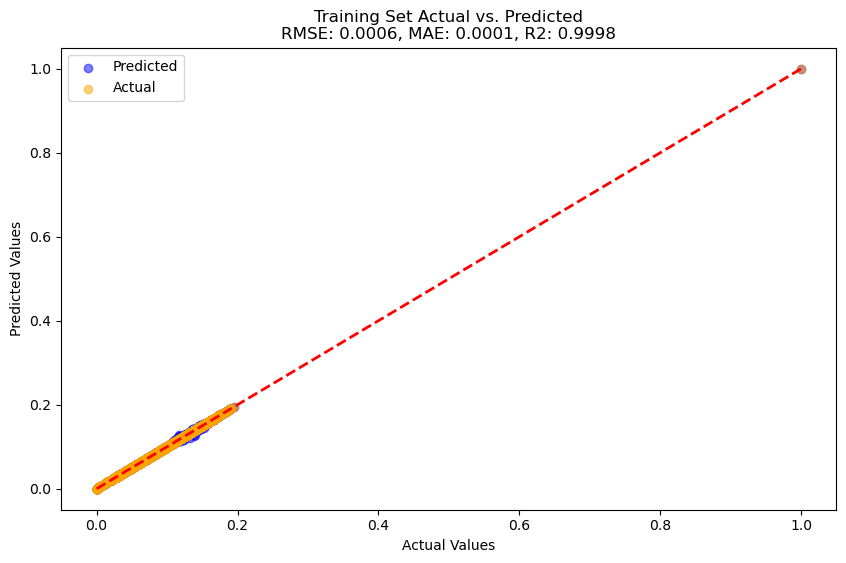

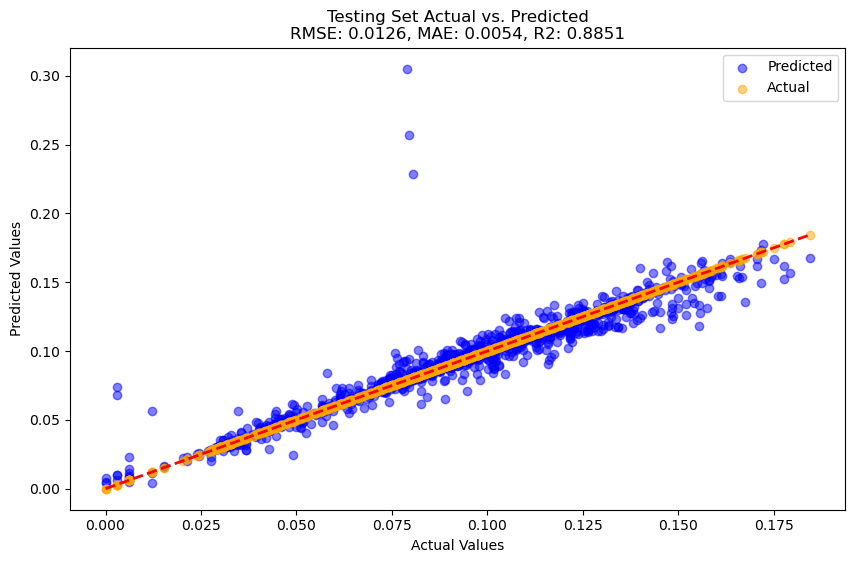

In [6]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from math import sqrt

# Define the file path to the Excel file
file_path = "C:/Users/Laura/OneDrive - HKUST (Guangzhou)/桌面/geological storage/pressure_splits_80_20.xlsx"

# Load the Excel file
xls = pd.ExcelFile(file_path)

# Load each sheet into a DataFrame and assign it to a variable
X_train = pd.read_excel(xls, sheet_name='X_train')
y_train = pd.read_excel(xls, sheet_name='y_train')
X_test = pd.read_excel(xls, sheet_name='X_test')
y_test = pd.read_excel(xls, sheet_name='y_test')

# Ensure all data is float and handle missing values
def clean_data(X, y):
    combined = pd.concat([X, y], axis=1)
    combined = combined.replace([np.inf, -np.inf], np.nan)
    combined = combined.dropna()
    return combined.iloc[:, :-y.shape[1]], combined.iloc[:, -y.shape[1]:]

X_train, y_train = clean_data(X_train, y_train)
X_test, y_test = clean_data(X_test, y_test)

# Optionally, print the shape of each DataFrame to verify the data
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Define the KNN model
knn_model = KNeighborsRegressor()

# Define the hyperparameters grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Measure training time
start_time = time.time()
grid_search.fit(X_train, y_train.values.ravel())
training_time = time.time() - start_time

# Best model after GridSearch
best_knn_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best hyperparameters found: ", grid_search.best_params_)

# Fit the best model on the training set
best_knn_model.fit(X_train, y_train.values.ravel())

# Make predictions on the datasets
y_train_pred = best_knn_model.predict(X_train)
y_test_pred = best_knn_model.predict(X_test)

# Calculate metrics for each set
train_rmse = sqrt(mean_squared_error(y_train, y_train_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_rmse = sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print metrics
print(f"Training RMSE: {train_rmse:.4f}, MAE: {train_mae:.4f}, R2: {train_r2:.4f}")
print(f"Testing RMSE: {test_rmse:.4f}, MAE: {test_mae:.4f}, R2: {test_r2:.4f}")

# Function to plot the actual vs. predicted values with different colors
def plot_actual_vs_predicted(y_true, y_pred, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, alpha=0.5, label='Predicted', color='blue')
    plt.scatter(y_true, y_true, alpha=0.5, label='Actual', color='orange')
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.title(title)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.legend()
    plt.show()

# Plot actual vs. predicted values for each set
plot_actual_vs_predicted(y_train.values, y_train_pred, f'Training Set Actual vs. Predicted\nRMSE: {train_rmse:.4f}, MAE: {train_mae:.4f}, R2: {train_r2:.4f}')
plot_actual_vs_predicted(y_test.values, y_test_pred, f'Testing Set Actual vs. Predicted\nRMSE: {test_rmse:.4f}, MAE: {test_mae:.4f}, R2: {test_r2:.4f}')


X_train shape: (101, 26)
y_train shape: (101, 1)
X_test shape: (44, 26)
y_test shape: (44, 1)
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best hyperparameters found:  {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'uniform'}
Training RMSE: 0.0579, MAE: 0.0338, R2: 0.8808
Testing RMSE: 0.1296, MAE: 0.0405, R2: 0.4690


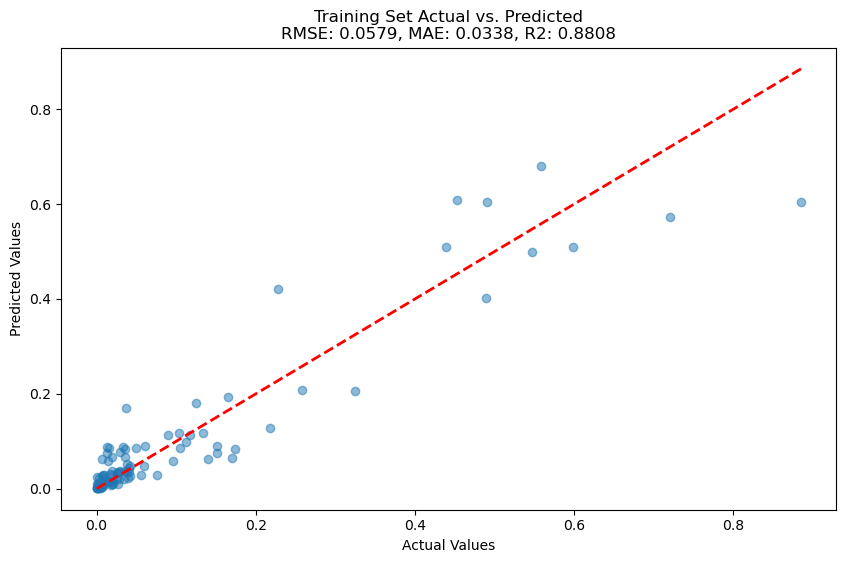

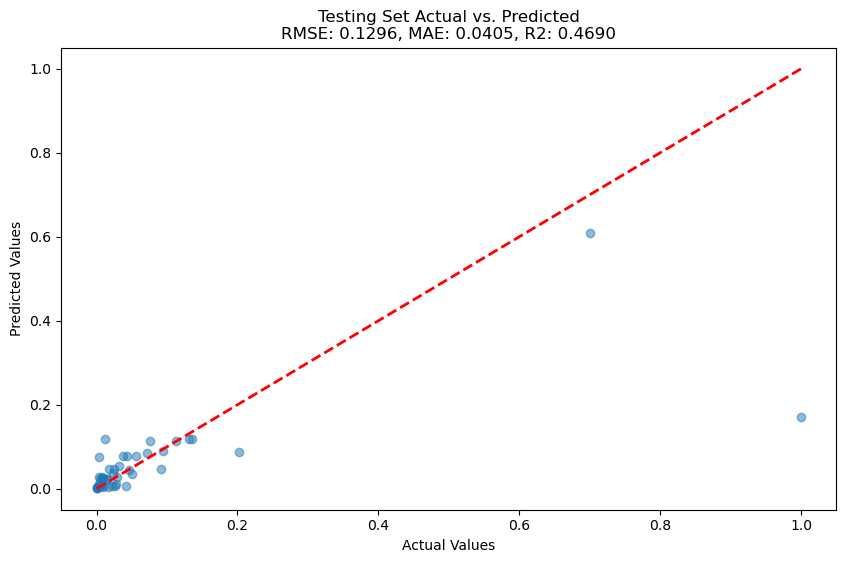

In [7]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from math import sqrt

# Define the file path to the Excel file
file_path = "C:/Users/Laura/OneDrive - HKUST (Guangzhou)/桌面/geological storage/capacity_splits_70_30.xlsx"

# Load the Excel file
xls = pd.ExcelFile(file_path)

# Load each sheet into a DataFrame and assign it to a variable
X_train = pd.read_excel(xls, sheet_name='X_train')
y_train = pd.read_excel(xls, sheet_name='y_train')
X_test = pd.read_excel(xls, sheet_name='X_test')
y_test = pd.read_excel(xls, sheet_name='y_test')

# Ensure all data is float and handle missing values
def clean_data(X, y):
    combined = pd.concat([X, y], axis=1)
    combined = combined.replace([np.inf, -np.inf], np.nan)
    combined = combined.dropna()
    return combined.iloc[:, :-y.shape[1]], combined.iloc[:, -y.shape[1]:]

X_train, y_train = clean_data(X_train, y_train)
X_test, y_test = clean_data(X_test, y_test)

# Optionally, print the shape of each DataFrame to verify the data
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Define the KNN model
knn_model = KNeighborsRegressor()

# Define the hyperparameters grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Measure training time
start_time = time.time()
grid_search.fit(X_train, y_train.values.ravel())
training_time = time.time() - start_time

# Best model after GridSearch
best_knn_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best hyperparameters found: ", grid_search.best_params_)

# Fit the best model on the training set
best_knn_model.fit(X_train, y_train.values.ravel())

# Make predictions on the datasets
y_train_pred = best_knn_model.predict(X_train)
y_test_pred = best_knn_model.predict(X_test)

# Calculate metrics for each set
train_rmse = sqrt(mean_squared_error(y_train, y_train_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_rmse = sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print metrics
print(f"Training RMSE: {train_rmse:.4f}, MAE: {train_mae:.4f}, R2: {train_r2:.4f}")
print(f"Testing RMSE: {test_rmse:.4f}, MAE: {test_mae:.4f}, R2: {test_r2:.4f}")

# Function to plot the actual vs. predicted values
def plot_actual_vs_predicted(y_true, y_pred, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.title(title)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.show()

# Plot actual vs. predicted values for each set
plot_actual_vs_predicted(y_train.values, y_train_pred, f'Training Set Actual vs. Predicted\nRMSE: {train_rmse:.4f}, MAE: {train_mae:.4f}, R2: {train_r2:.4f}')
plot_actual_vs_predicted(y_test.values, y_test_pred, f'Testing Set Actual vs. Predicted\nRMSE: {test_rmse:.4f}, MAE: {test_mae:.4f}, R2: {test_r2:.4f}')


X_train shape: (101, 26)
y_train shape: (101, 1)
X_test shape: (44, 26)
y_test shape: (44, 1)
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best hyperparameters found:  {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'uniform'}
Training RMSE: 0.0579, MAE: 0.0338, R2: 0.8808
Testing RMSE: 0.1296, MAE: 0.0405, R2: 0.4690


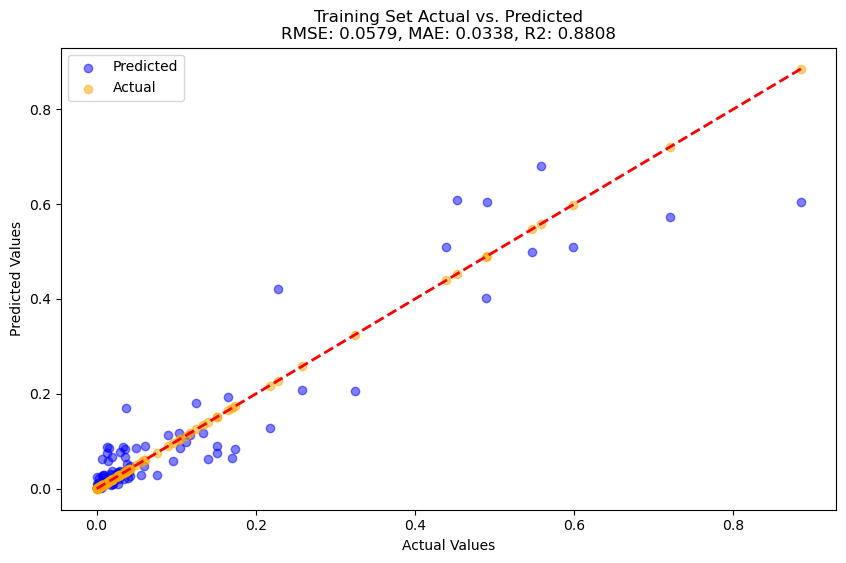

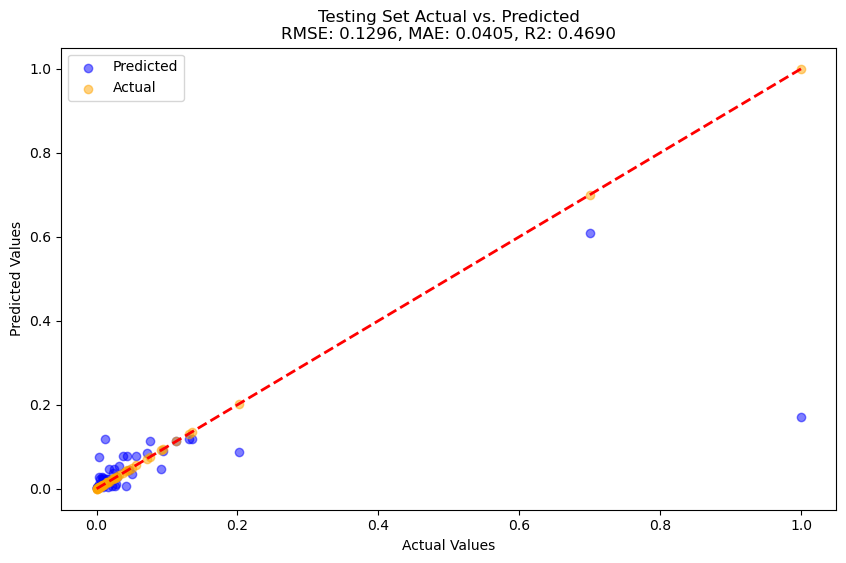

In [7]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from math import sqrt

# Define the file path to the Excel file
file_path = "C:/Users/Laura/OneDrive - HKUST (Guangzhou)/桌面/geological storage/capacity_splits_70_30.xlsx"

# Load the Excel file
xls = pd.ExcelFile(file_path)

# Load each sheet into a DataFrame and assign it to a variable
X_train = pd.read_excel(xls, sheet_name='X_train')
y_train = pd.read_excel(xls, sheet_name='y_train')
X_test = pd.read_excel(xls, sheet_name='X_test')
y_test = pd.read_excel(xls, sheet_name='y_test')

# Ensure all data is float and handle missing values
def clean_data(X, y):
    combined = pd.concat([X, y], axis=1)
    combined = combined.replace([np.inf, -np.inf], np.nan)
    combined = combined.dropna()
    return combined.iloc[:, :-y.shape[1]], combined.iloc[:, -y.shape[1]:]

X_train, y_train = clean_data(X_train, y_train)
X_test, y_test = clean_data(X_test, y_test)

# Optionally, print the shape of each DataFrame to verify the data
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Define the KNN model
knn_model = KNeighborsRegressor()

# Define the hyperparameters grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Measure training time
start_time = time.time()
grid_search.fit(X_train, y_train.values.ravel())
training_time = time.time() - start_time

# Best model after GridSearch
best_knn_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best hyperparameters found: ", grid_search.best_params_)

# Fit the best model on the training set
best_knn_model.fit(X_train, y_train.values.ravel())

# Make predictions on the datasets
y_train_pred = best_knn_model.predict(X_train)
y_test_pred = best_knn_model.predict(X_test)

# Calculate metrics for each set
train_rmse = sqrt(mean_squared_error(y_train, y_train_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_rmse = sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print metrics
print(f"Training RMSE: {train_rmse:.4f}, MAE: {train_mae:.4f}, R2: {train_r2:.4f}")
print(f"Testing RMSE: {test_rmse:.4f}, MAE: {test_mae:.4f}, R2: {test_r2:.4f}")

# Function to plot the actual vs. predicted values with different colors
def plot_actual_vs_predicted(y_true, y_pred, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, alpha=0.5, label='Predicted', color='blue')
    plt.scatter(y_true, y_true, alpha=0.5, label='Actual', color='orange')
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.title(title)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.legend()
    plt.show()

# Plot actual vs. predicted values for each set
plot_actual_vs_predicted(y_train.values, y_train_pred, f'Training Set Actual vs. Predicted\nRMSE: {train_rmse:.4f}, MAE: {train_mae:.4f}, R2: {train_r2:.4f}')
plot_actual_vs_predicted(y_test.values, y_test_pred, f'Testing Set Actual vs. Predicted\nRMSE: {test_rmse:.4f}, MAE: {test_mae:.4f}, R2: {test_r2:.4f}')


X_train shape: (108, 26)
y_train shape: (108, 1)
X_test shape: (37, 26)
y_test shape: (37, 1)
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best hyperparameters found:  {'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}
Training RMSE: 0.0000, MAE: 0.0000, R2: 1.0000
Testing RMSE: 0.1322, MAE: 0.0434, R2: 0.5309


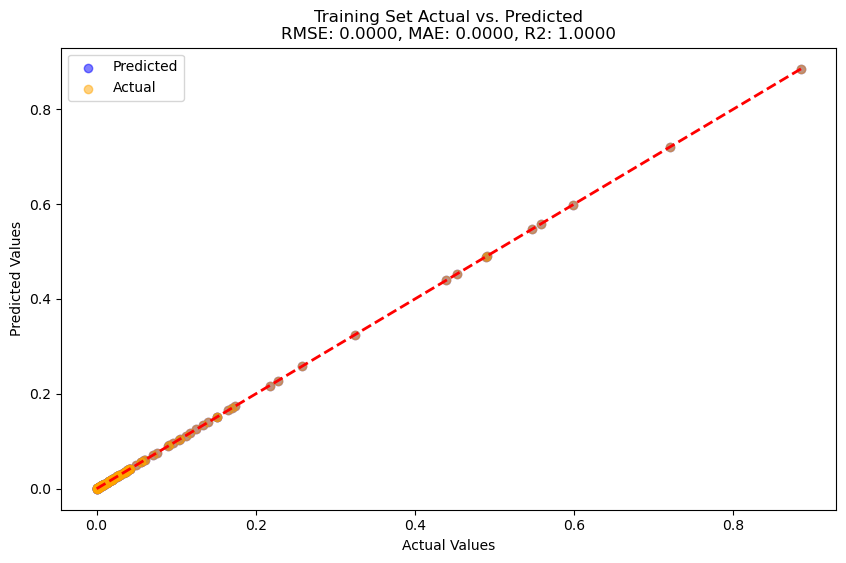

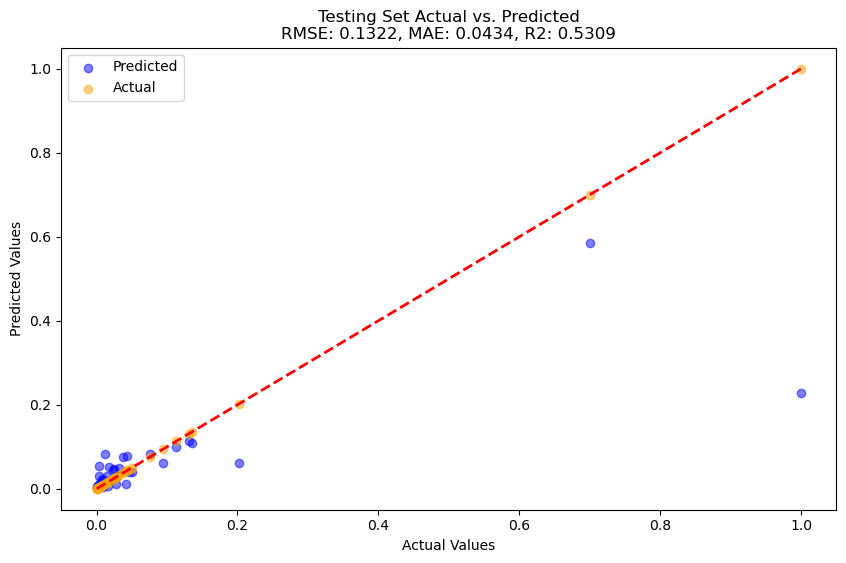

In [8]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from math import sqrt

# Define the file path to the Excel file
file_path = "C:/Users/Laura/OneDrive - HKUST (Guangzhou)/桌面/geological storage/capacity_splits_75_25.xlsx"

# Load the Excel file
xls = pd.ExcelFile(file_path)

# Load each sheet into a DataFrame and assign it to a variable
X_train = pd.read_excel(xls, sheet_name='X_train')
y_train = pd.read_excel(xls, sheet_name='y_train')
X_test = pd.read_excel(xls, sheet_name='X_test')
y_test = pd.read_excel(xls, sheet_name='y_test')

# Ensure all data is float and handle missing values
def clean_data(X, y):
    combined = pd.concat([X, y], axis=1)
    combined = combined.replace([np.inf, -np.inf], np.nan)
    combined = combined.dropna()
    return combined.iloc[:, :-y.shape[1]], combined.iloc[:, -y.shape[1]:]

X_train, y_train = clean_data(X_train, y_train)
X_test, y_test = clean_data(X_test, y_test)

# Optionally, print the shape of each DataFrame to verify the data
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Define the KNN model
knn_model = KNeighborsRegressor()

# Define the hyperparameters grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Measure training time
start_time = time.time()
grid_search.fit(X_train, y_train.values.ravel())
training_time = time.time() - start_time

# Best model after GridSearch
best_knn_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best hyperparameters found: ", grid_search.best_params_)

# Fit the best model on the training set
best_knn_model.fit(X_train, y_train.values.ravel())

# Make predictions on the datasets
y_train_pred = best_knn_model.predict(X_train)
y_test_pred = best_knn_model.predict(X_test)

# Calculate metrics for each set
train_rmse = sqrt(mean_squared_error(y_train, y_train_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_rmse = sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print metrics
print(f"Training RMSE: {train_rmse:.4f}, MAE: {train_mae:.4f}, R2: {train_r2:.4f}")
print(f"Testing RMSE: {test_rmse:.4f}, MAE: {test_mae:.4f}, R2: {test_r2:.4f}")

# Function to plot the actual vs. predicted values with different colors
def plot_actual_vs_predicted(y_true, y_pred, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, alpha=0.5, label='Predicted', color='blue')
    plt.scatter(y_true, y_true, alpha=0.5, label='Actual', color='orange')
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.title(title)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.legend()
    plt.show()

# Plot actual vs. predicted values for each set
plot_actual_vs_predicted(y_train.values, y_train_pred, f'Training Set Actual vs. Predicted\nRMSE: {train_rmse:.4f}, MAE: {train_mae:.4f}, R2: {train_r2:.4f}')
plot_actual_vs_predicted(y_test.values, y_test_pred, f'Testing Set Actual vs. Predicted\nRMSE: {test_rmse:.4f}, MAE: {test_mae:.4f}, R2: {test_r2:.4f}')


X_train shape: (116, 26)
y_train shape: (116, 1)
X_test shape: (29, 26)
y_test shape: (29, 1)
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best hyperparameters found:  {'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'distance'}
Training RMSE: 0.0000, MAE: 0.0000, R2: 1.0000
Testing RMSE: 0.1571, MAE: 0.0509, R2: 0.4655


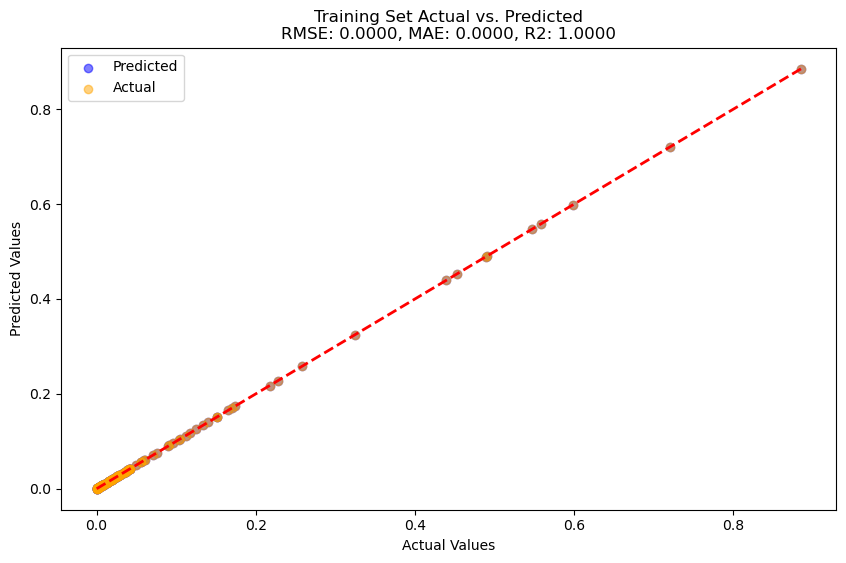

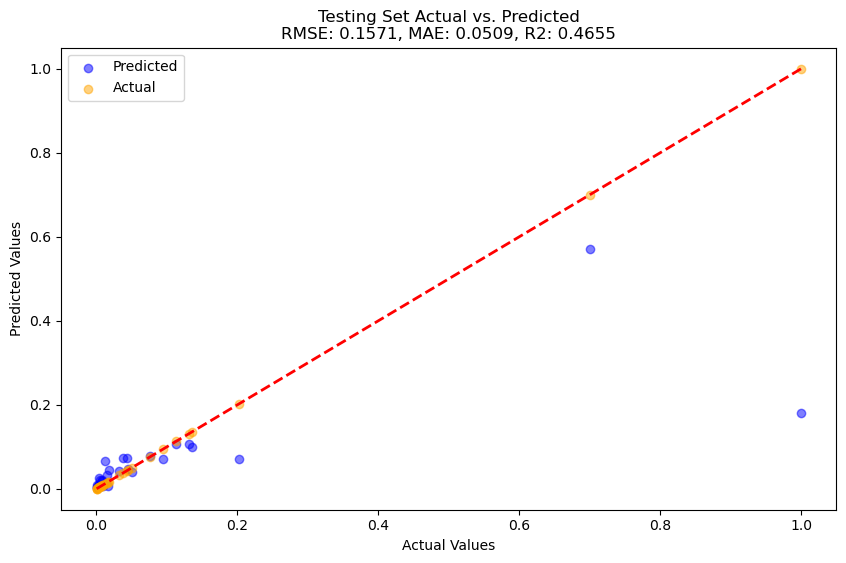

In [9]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from math import sqrt

# Define the file path to the Excel file
file_path = "C:/Users/Laura/OneDrive - HKUST (Guangzhou)/桌面/geological storage/capacity_splits_80_20.xlsx"

# Load the Excel file
xls = pd.ExcelFile(file_path)

# Load each sheet into a DataFrame and assign it to a variable
X_train = pd.read_excel(xls, sheet_name='X_train')
y_train = pd.read_excel(xls, sheet_name='y_train')
X_test = pd.read_excel(xls, sheet_name='X_test')
y_test = pd.read_excel(xls, sheet_name='y_test')

# Ensure all data is float and handle missing values
def clean_data(X, y):
    combined = pd.concat([X, y], axis=1)
    combined = combined.replace([np.inf, -np.inf], np.nan)
    combined = combined.dropna()
    return combined.iloc[:, :-y.shape[1]], combined.iloc[:, -y.shape[1]:]

X_train, y_train = clean_data(X_train, y_train)
X_test, y_test = clean_data(X_test, y_test)

# Optionally, print the shape of each DataFrame to verify the data
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Define the KNN model
knn_model = KNeighborsRegressor()

# Define the hyperparameters grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Measure training time
start_time = time.time()
grid_search.fit(X_train, y_train.values.ravel())
training_time = time.time() - start_time

# Best model after GridSearch
best_knn_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best hyperparameters found: ", grid_search.best_params_)

# Fit the best model on the training set
best_knn_model.fit(X_train, y_train.values.ravel())

# Make predictions on the datasets
y_train_pred = best_knn_model.predict(X_train)
y_test_pred = best_knn_model.predict(X_test)

# Calculate metrics for each set
train_rmse = sqrt(mean_squared_error(y_train, y_train_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_rmse = sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print metrics
print(f"Training RMSE: {train_rmse:.4f}, MAE: {train_mae:.4f}, R2: {train_r2:.4f}")
print(f"Testing RMSE: {test_rmse:.4f}, MAE: {test_mae:.4f}, R2: {test_r2:.4f}")

# Function to plot the actual vs. predicted values with different colors
def plot_actual_vs_predicted(y_true, y_pred, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, alpha=0.5, label='Predicted', color='blue')
    plt.scatter(y_true, y_true, alpha=0.5, label='Actual', color='orange')
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.title(title)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.legend()
    plt.show()

# Plot actual vs. predicted values for each set
plot_actual_vs_predicted(y_train.values, y_train_pred, f'Training Set Actual vs. Predicted\nRMSE: {train_rmse:.4f}, MAE: {train_mae:.4f}, R2: {train_r2:.4f}')
plot_actual_vs_predicted(y_test.values, y_test_pred, f'Testing Set Actual vs. Predicted\nRMSE: {test_rmse:.4f}, MAE: {test_mae:.4f}, R2: {test_r2:.4f}')
